Intercept: 0.18
Slope: 1.98


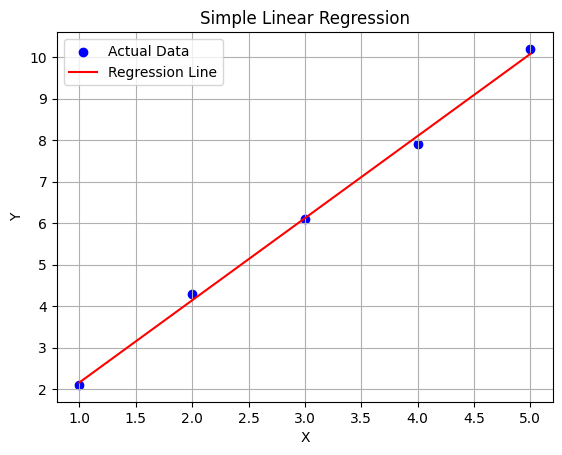

In [4]:
# Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
#  Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)
X = df[['Area', 'Rooms']]
y = df['Price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.2f}")

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients:
  Area: 63.16
  Rooms: 34736.84

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Intercept: 0.06
Coefficients: [0.   1.94 0.2 ]


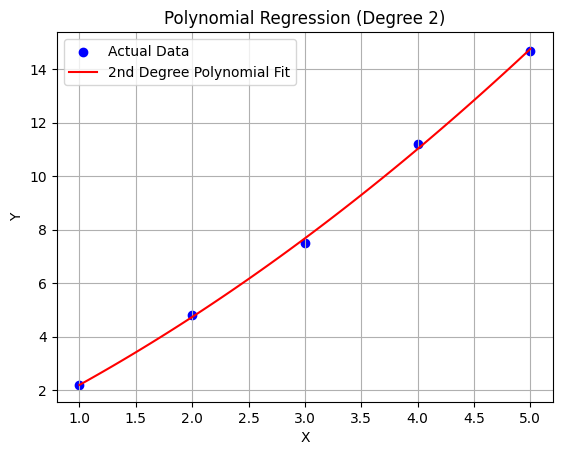

In [7]:
#  Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_fit = np.linspace(1, 5, 100).reshape(-1, 1)
X_fit_poly = poly.transform(X_fit)
Y_pred = model.predict(X_fit_poly)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {model.coef_}")

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X_fit, Y_pred, color='red', label='2nd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()


Intercept: 6.50
Slope: 1.15
Residuals: [-3.   5.5 -1.  -2.5  1. ]


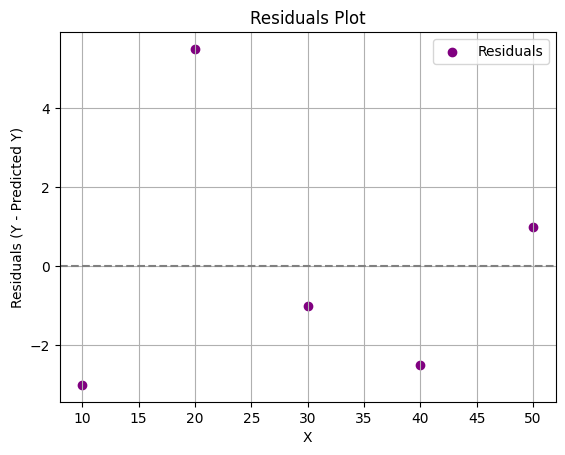

In [9]:
# Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

residuals = Y - Y_pred

print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")
print(f"Residuals: {residuals}")

plt.scatter(X, residuals, color='purple', marker='o', label='Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("X")
plt.ylabel("Residuals (Y - Predicted Y)")
plt.grid(True)
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           0.000985
Time:                        16:09:16   Log-Likelihood:                -62.917
No. Observations:                   7   AIC:                             135.8
Df Residuals:                       2   BIC:                             135.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -437.9562    1.2e+0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


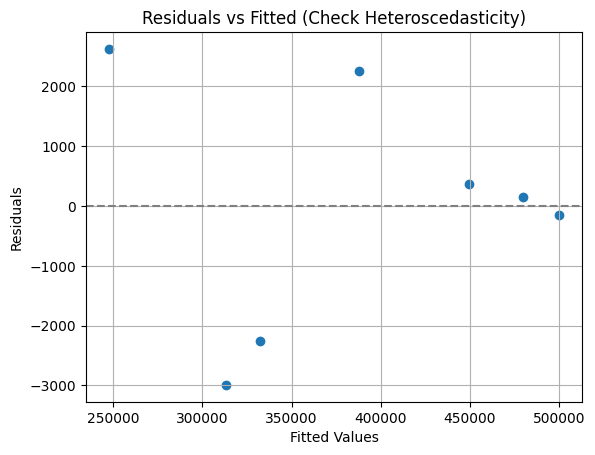


VIF Values:
              Feature        VIF
0               Area  18.691345
1              Rooms  15.724713
2  Location_Suburban   3.727842
3     Location_Urban   4.742440

Model with Log(Price):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1134.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           0.000882
Time:                        16:09:16   Log-Likelihood:                 27.170
No. Observations:                   7   AIC:                            -44.34
Df Residuals:                       2   BIC:                            -44.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
           

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [27]:
#  Imagine you are a data scientist working for a real estate company.
# You need to predict house prices using features like area, number of rooms, and location.
# However, you detect heteroscedasticity and multicollinearity in your regression model.
# Explain the steps you would take to address these issues and ensure a robust model.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

data = {
    'Area': [1200, 1500, 1800, 2000, 2500, 3000, 3200],
    'Rooms': [2, 3, 3, 4, 4, 5, 5],
    'Location': ['Urban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Rural', 'Rural'],
    'Price': [250000, 310000, 330000, 390000, 450000, 480000, 500000]
}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

X_const = sm.add_constant(X)

for col in ['Location_Suburban', 'Location_Urban']:
    if col in X_const.columns:
        X_const[col] = X_const[col].astype(int)

ols_model = sm.OLS(y, X_const).fit()
print(ols_model.summary())

residuals = ols_model.resid
plt.scatter(ols_model.fittedvalues, residuals)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Check Heteroscedasticity)')
plt.grid(True)
plt.show()


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])][1:]
print("\nVIF Values:\n", vif_data)


y_log = np.log(y)

ols_log_model = sm.OLS(y_log, X_const).fit()
print("\nModel with Log(Price):\n")
print(ols_log_model.summary())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y_log)

print("\nRidge Coefficients (on log-transformed Price and scaled features):")

for name, coef in zip(X.columns, ridge.coef_):
    print(f"{name}: {coef:.4f}")

